### Homework 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Weather-check survey

In [3]:
data = pd.read_csv('C:/Users/Taguhi/Downloads/Data.csv')
data

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   RespondentID                                                                                                                                  928 non-null    int64 
 1   Do you typically check a daily weather report?                                                                                                928 non-null    object
 2   How do you typically check the weather?                                                                                                       928 non-null    object
 3   A specific website or app (please provide

### Changing names and types of some columns

In [5]:
data['RespondentID'] = data.RespondentID.astype('O')
data.rename(columns = {'Do you typically check a daily weather report?':'checking_weather',
                       'A specific website or app (please provide the answer)':'specific_app',
                       'How do you typically check the weather?':'way_of_checking',
                       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'checking_by_smartwatch',
                       'What is your gender?':'gender',
                       'How much total combined money did all members of your HOUSEHOLD earn last year?':'household_earning',
                      },
                       inplace = True
                      )

In [6]:
data.describe(include = 'O')

,RespondentID,checking_weather,way_of_checking,specific_app,checking_by_smartwatch,Age,gender,household_earning,US Region
count,928,928,928,928,928,928,928,928,928
unique,928,2,9,122,5,5,3,12,10
top,3879934990,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,1,746,213,753,362,278,527,169,185


In [7]:
data.isna().sum()

RespondentID              0
checking_weather          0
way_of_checking           0
specific_app              0
checking_by_smartwatch    0
Age                       0
gender                    0
household_earning         0
US Region                 0
dtype: int64

### Summary data about respondents

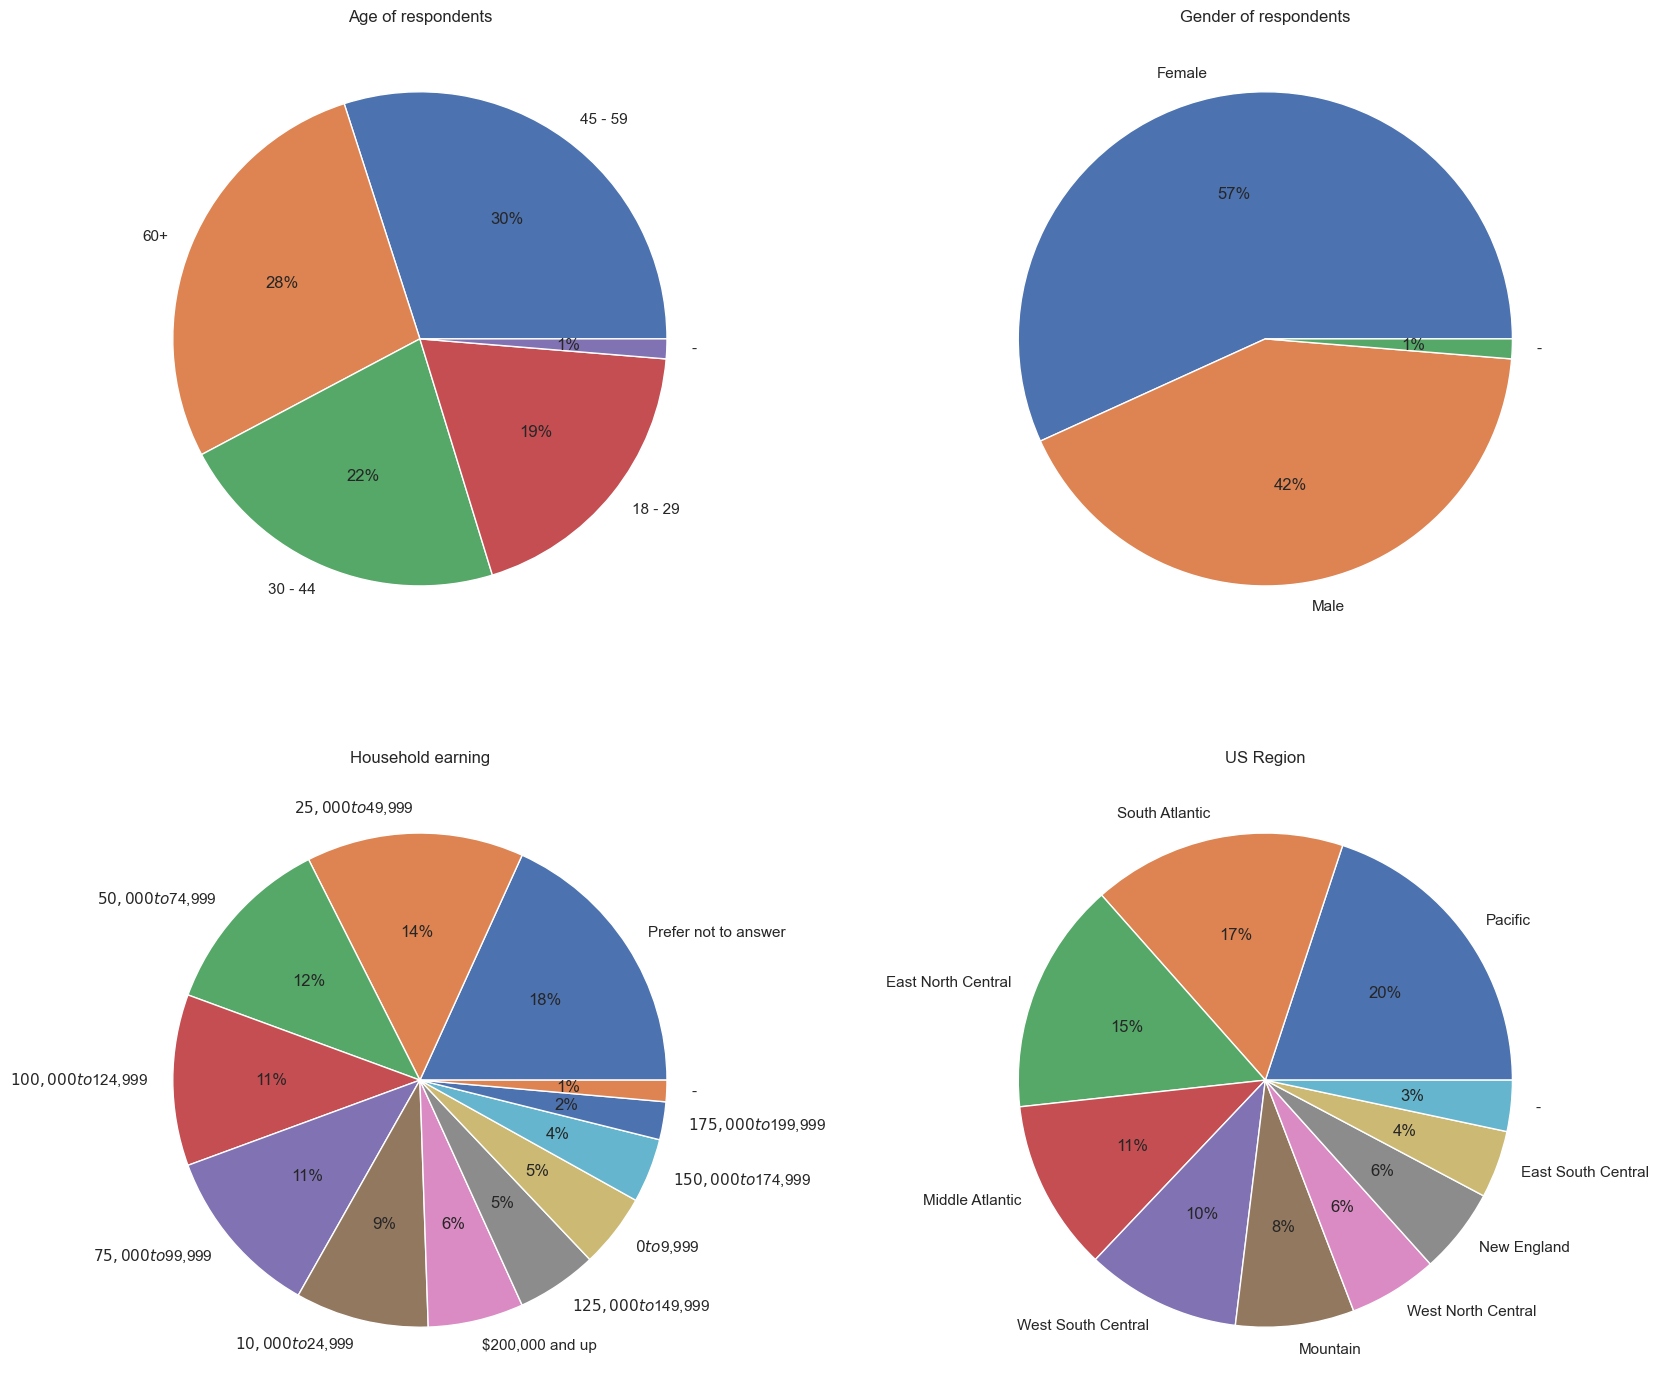

In [225]:
fig, axes = plt.subplots(2, 2, figsize=(20,18)  , dpi=100)
data['Age'].value_counts().plot(title = 'Age of respondents', kind='pie', ax=axes[0,0],autopct='%1.0f%%', label = '')
data['gender'].value_counts().plot(title = 'Gender of respondents', kind='pie', ax=axes[0,1],autopct='%1.0f%%',label = '')
data['household_earning'].value_counts().plot(title = 'Household earning', kind='pie', ax=axes[1,0],autopct='%1.0f%%',label = '')
data['US Region'].value_counts().plot(title = 'US Region', kind='pie', ax=axes[1,1],autopct='%1.0f%%',label = '')
plt.show()


### Summary of responces

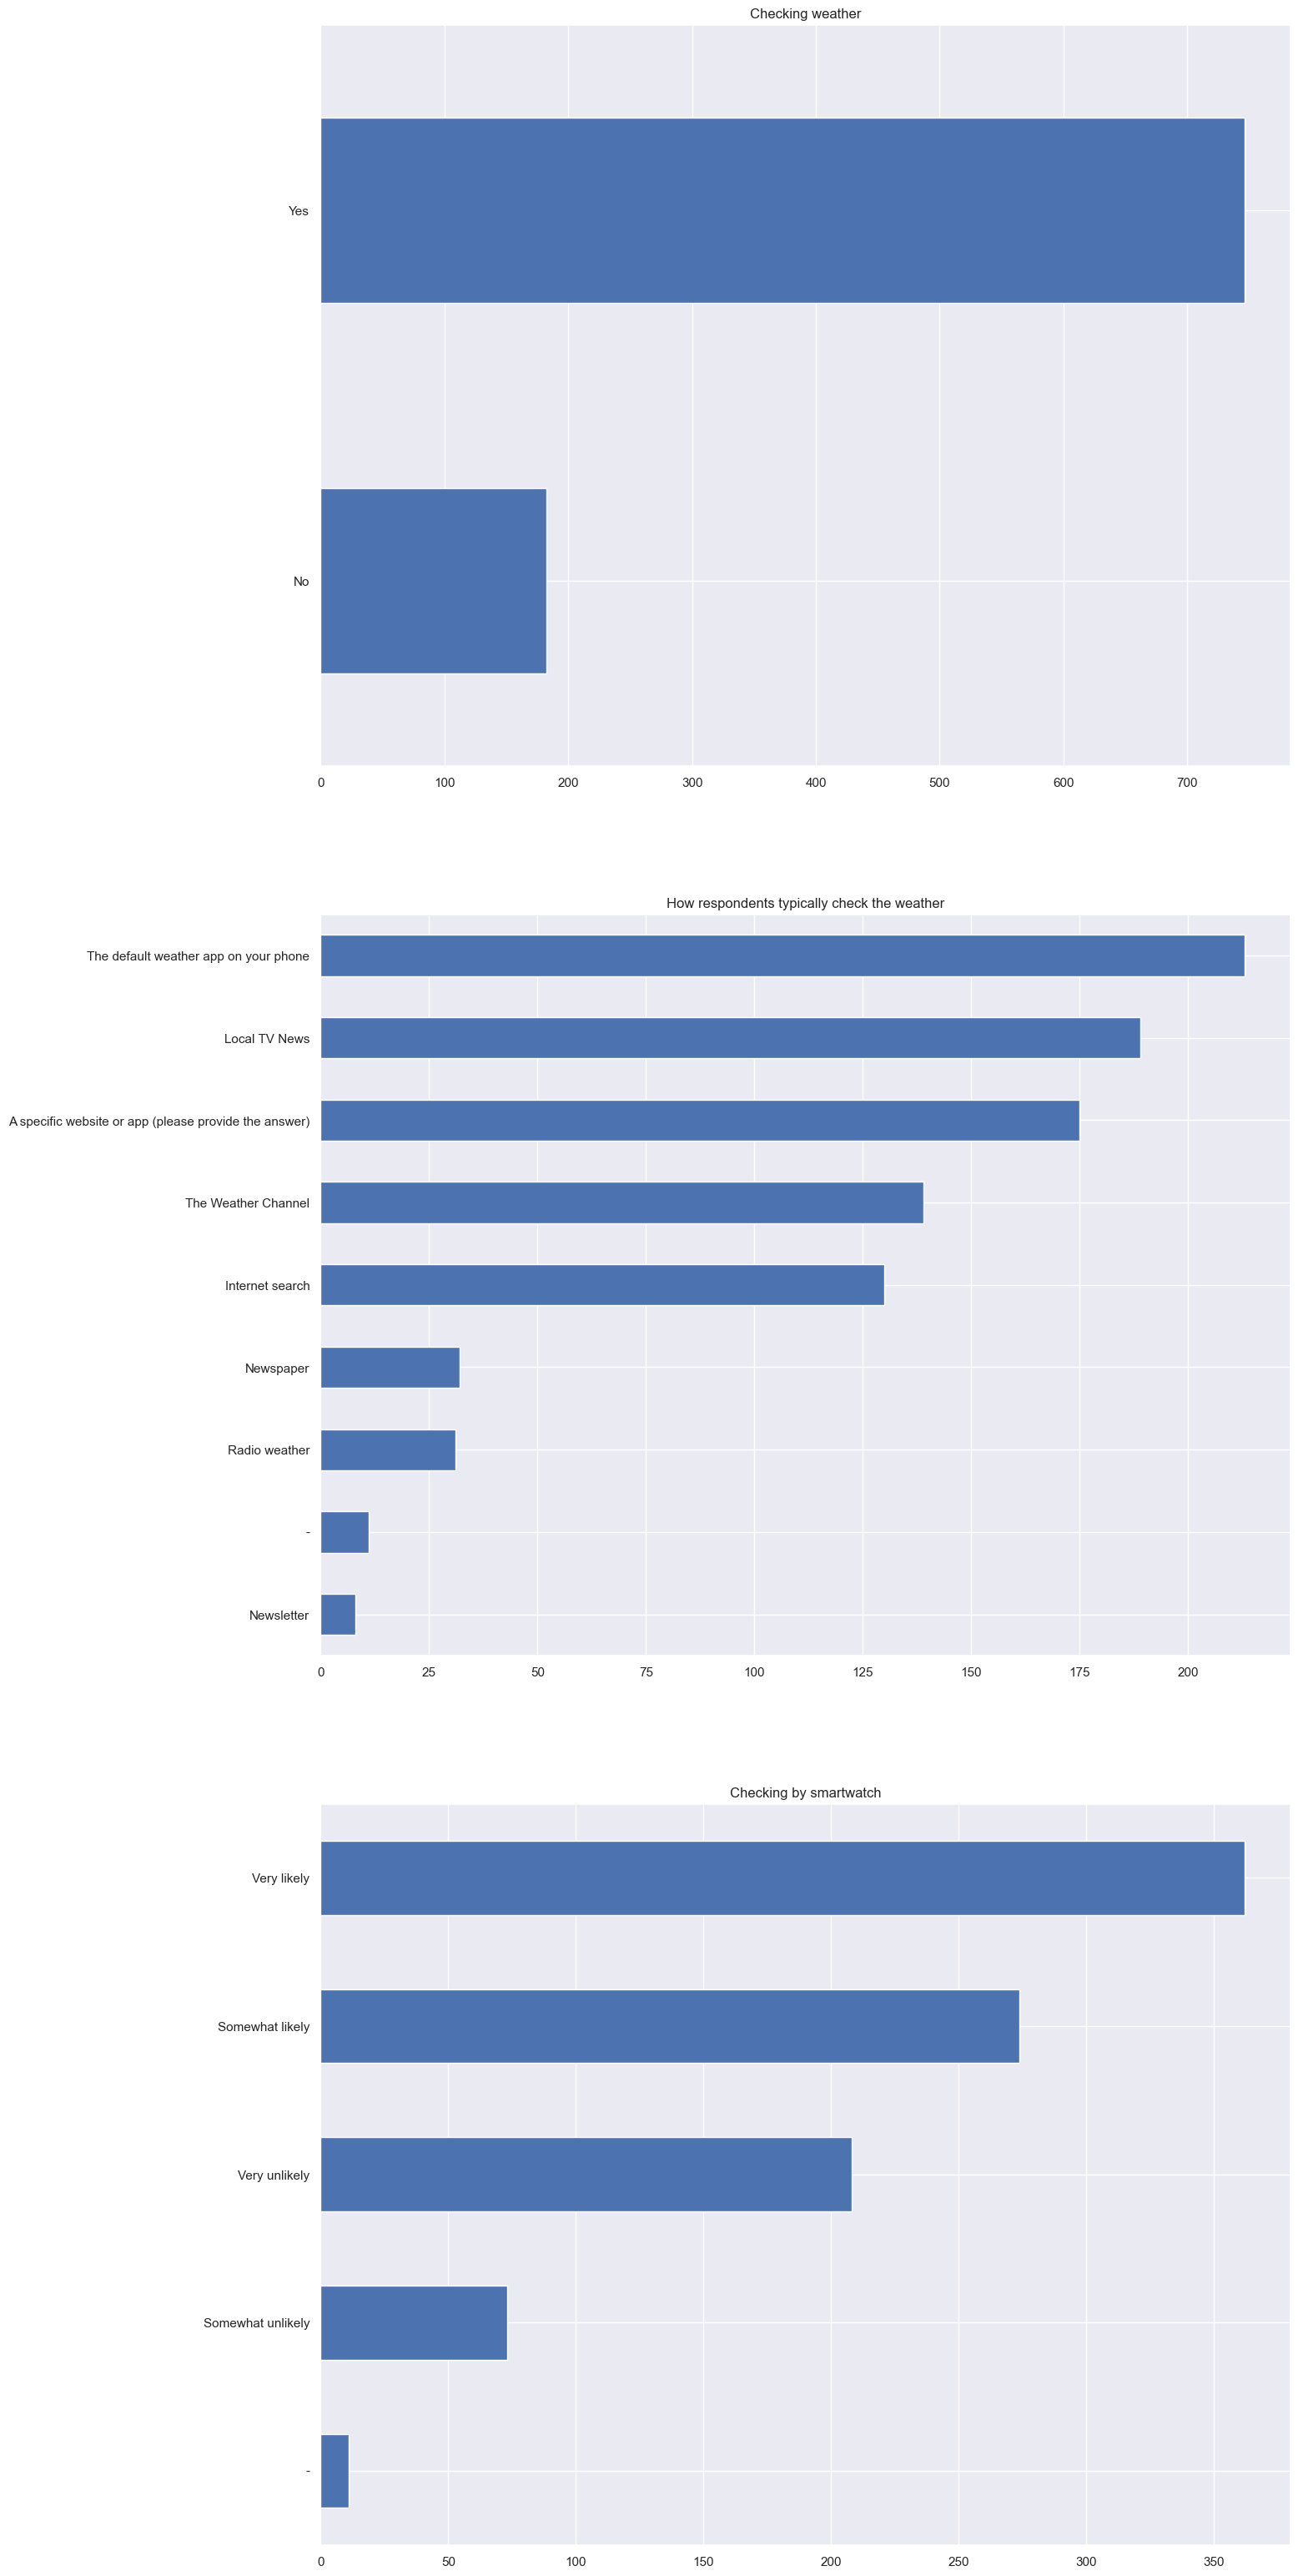

In [249]:
fig, axes = plt.subplots(3, 1, figsize=(15,40)  , dpi=100)
ax= data['checking_weather'].value_counts().plot(title = 'Checking weather', kind='barh', ax=axes[0])
ax.invert_yaxis()
a=data['way_of_checking'].value_counts().plot(title = 'How respondents typically check the weather', kind='barh', ax=axes[1])
a.invert_yaxis()
data['checking_by_smartwatch'].value_counts().plot(title = 'Checking by smartwatch', kind='barh', ax=axes[2])
plt.gca().invert_yaxis()
plt.show()

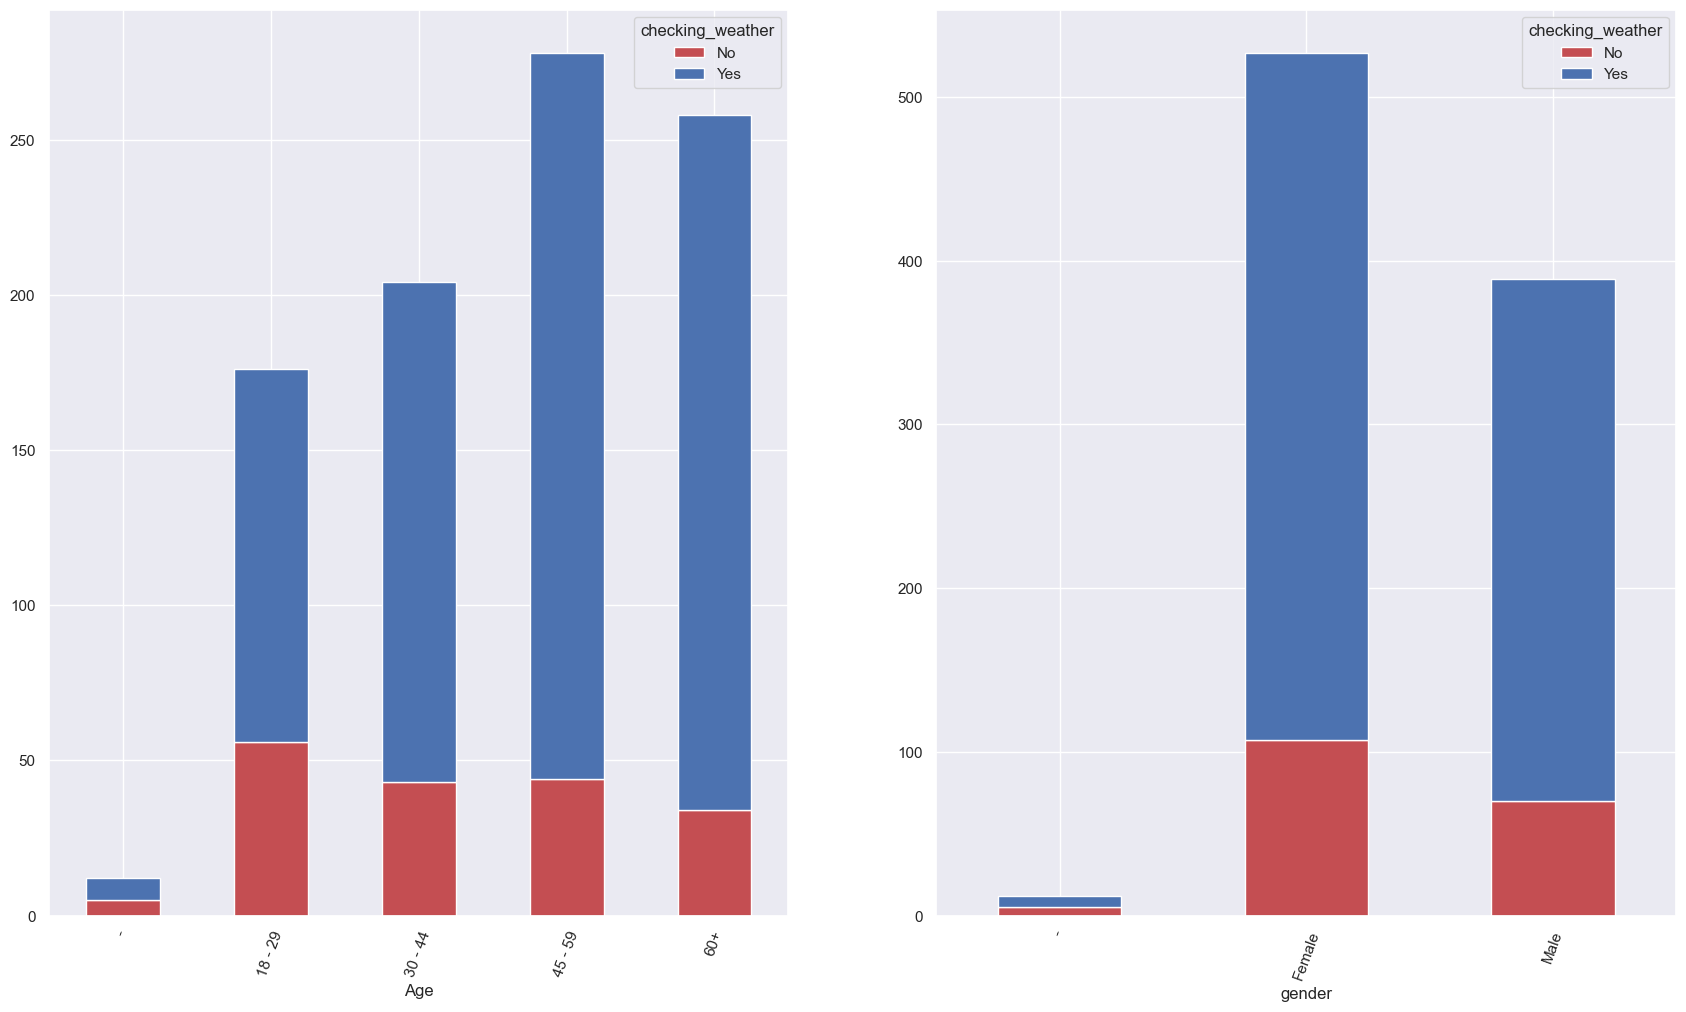

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(21,12)  , dpi=100)
pd.crosstab(data['Age'], data['checking_weather']).plot(kind='bar', stacked=True,color = 'rb', rot = 70,ax=axes[0])
pd.crosstab(data['gender'], data['checking_weather']).plot(kind='bar', stacked=True,color = 'rb', rot = 70,ax=axes[1])
plt.show()